<a href="https://colab.research.google.com/github/caropilardiaz/Mentoria-Imagenes_Drones/blob/master/2_PracticoAyC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Diplomatura en Ciencias de Datos, Aprendizaje Automático y sus Aplicaciones

## Mentoria Diplomatura en Ciencia de Datos 2020
### "Detección del desarrollo del cultivo con imágenes de Drones"


### Analisis y Curación de datos
Se propone la elaboración de un informe o presentacion, en formato jupyter notebook que responda a las cuestiones solicitadas en cada seccion de este notebook.El informe debe contener los resultado obtenidos de cada items.



En este práctico partiremos de los datos crudos "Dron1.csv" como al inicio del práctico de visualización, e incluiremos algunos más. La idea general es dejar preparado un único dataset que nos permita alimentar futuros modelos de aprendizaje automático.

Deberán incluir la información meteorológica "clima_2018.csv" pertinente en el dataset final.Para unificar los reportes, se recomienda utilizar el método "merge" de pandas ó el que ustedes elijan.

Es importante que cada decisión que tomen sobre los datos quede debidamente documentada.

Se recomienda trabajar empleando algún checklist para asegurarse de cumplir todas las etapas del proceso de curación. Pueden utilizar el checklist que vieron en clase, o algún otro que consideren más apropiado (en las referencias tienen uno a modo de ejemplo).

### ACLARACIONES ###



#### Chequeos puntuales por campo
Campo **"RDTO"**:Es una variable contínua que representa uno de los targets para algoritmos con salidas de variables contínuas

Campo **"Conj de datos"**: Verán que en este campo aparecen dos categorias que se asocian al momento de siembra diferente dentro del mismo ensayo. Las categorías "1rasiembra", "2dasiembra" indican agronómicamente siembra temprana y siembra tardía no puede haber un tipo distinto de categoría.

Campo **"ciclo"**: Este campo también indica categorías bipuntuales.Cada genotipo tiene un determinado ciclo fenológico, ésta variable indica a que ciclo pertenece cada uno.Son grupos de interés y se encuentran tanto en fechas tempranas como en tardías. 

Campo **"Roya"**: Noten que este campo en particular contiene muchos valores pertencientes a la categoría nulos que significa ausencia de la enfermedad. Deberán determinar que hacer si es necesario incorporarla o no.

Campo **"Manchas Foliares"**: No presenta variabilidad ni valores contundentes, significa que el cultivo en general no adolece de la enfermedad. Deberán decidir y documentar.

Campo **"Fusariosis, Carbón y Adversidad"**:Observa que las categorías son muy diferentes en cardinalidad significa que no presenta enfermedades el cultivo. Decidir y documentar acerca de éstas variables.Acá deberán evaluar si conviene modificar el campo. Por ejemplo, mantener las categorías  y recategorizar las demás como "Otras". En cualquier caso, justifiquen la decisión tomada.

Campo **"Zadok"**; Es nuestro otro target y es una variable categórica la variable zadok describe el estadío fenológico en que se encuentran las variedades e inclusive el ensayo discrimina dos estadíos fenológicos de la misma variedad utilizando fechas de siembras diferentes. Observar y documentar.
 
Campo **"Fecha espigazón"**: Esta es la fecha en la que se medió el comienzo de la espigazón para cada variedad. Corroborar que la misma es anterior a la fecha de madurez.Verificar que las fechas pertenecen al rango temporal correspondiente (en este caso,sólo al año 2018). Son datos cargados manualmente con muchos errores los 2016 7 2015 agregar a 2018, 

Campo **"Fecha madurez"**: Fecha que se mide manualmente en todas la variedades. Datos muy sucios pero que se deben corresponder a fechas posteriores a las fechas de espigazón, durante el 2018.Los 2016 y 2015 agregar a 2018.

Campo **"Variedades"**: Este campo indica los genotipos que se usaron en el ensayo, es interesante observar que las mismas variedades fueron implantadas en una fecha y en la otra. Deberán observar que variedades coincide exactamente con la variable parcela, decidir y documentar acerca del tratamiento de las mismas.

Campos **"Rep, Fila y Col"**: Van a ver que estos campos son bastante irrelevantes. Acá la recomendación es distinguir sólo si pertenece a la variedad o no y en que zadok está la misma variedad,en definitiva tenemos 3 parcelas con la misma variedad en la primera fecha de siembra, y 3 parcelas con exactamente la misma variedad en la segunda fecha de siembra pero en distinto estadío Zadok. 


### Incorporación de información climática
El dataset "climaReporte_2018.csv" contiene información climática segmentada por día. Esta información es de carácter público y fue obtenida del Sistema de gestión Clima del Dpto de información agronómica de BCCBA,  https://clima.bccba.org.ar/accounts/login/?next=/ . Determinen qué información puede ser relevante para la problemática de la mentoría e incorporenla al dataset agronómico obteniendo un dataset final.



### Referencias
https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning

"C:/Users/Juanca/Desktop/gaspar/DiploDatos/Mentoria-Imagenes_Drones-master/practico 1/Dron1.csv"

## **Importamos paquetes**

In [1]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
# Puede que nos sirvan también
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)

In [3]:
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [5]:
DATA_DIRECTORY = 'C:/Users/Franco/Desktop/Mentoria-Imagenes_Drones/'


## Consigna para Curación y Exploración del Dataset

## I. Rutina de Curación
Inicialmente, con el objetivo de preparar los datos que alimentarán futuros modelos de aprendizaje automático (ML), se propone seguir la siguiente checklist para la limpieza de los datos de nuestro proyecto. Esta checklist es la misma que utilizaron en el primer práctico de la materia y nos será de utilidad como guía para curar el dataset. A modo de ayuda, en esta notebook encontrarán una especie de template que sigue la checklist y que deberán ir completando.

Cada decisión tomada deberá quedar registrada de manera explícita y clara. Luego de pasar por todos los puntos de la checklist propuesta, deberán almacenar en un nuevo archivo los datos resultantes. A los fines de realizar este práctico, se utilizará el dataset original, pero descartando todas aquellas columnas que se hayan calculado en base a features preexistentes, ya que éstas están relacionadas a decisiones que adoptaremos más adelante, como por ejemplo, sobre si es necesario crear nuevas features y si incluirlas o no. Recuerden que la ciencia de datos es un proceso circular, continuo y no lineal. Es decir, si los datos requieren de mayor procesamiento para satisfacer las necesidades de algoritmos de ML (cualesquiera de ellos), vamos a volver a la etapa inicial para, por ejemplo, crear nuevas features, tomar decisiones diferentes sobre valores faltantes o valores atípicos (outliers), descartar features, entre otras.
### **1. Importación de Datos**
#### 1.1 Cargamos datos agronómicos

In [6]:
#Editar con el path correspondiente a sus datos
dfa = pd.read_csv(os.path.join(DATA_DIRECTORY,'Dron1.csv'))

#, parse_dates = ["Fecha de espigaz?", "Fecha de madurez"]

C:\Users\Franco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
print(dfa.shape)
dfa.sample(5)

(38920, 45)


,Longitude,Latitude,Conjunto de datos,ID,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
32570,-2.057.284.987.665.580,-2.120.817.923.929.080,2daSiembra,12228,CC,Variedad_C,2,120,5.8,2,36,58000,14270,57800,37580,17746,-0.5302,-0.3585,-0.7953,0.6762,0.1086,1.2436,0.3070,-0.7503,10.5342,-0.6040,-0.8851,-1.1298,0,cero,cero,0,0.00,30/9/2015,30/11/2015,61,1.5,85.0,2.0,80.4,32.0,2970,10.4,3094,6189
13218,-2.057.313.491.054.710,-2.120.847.103.560.110,1er Siembra,5047,CC,Variedad_S,1,45,6.1,1,12,46400,93300,51200,22330,10162,-0.6688,-0.3745,-1.0032,0.5600,-0.8036,0.1089,0.1985,-0.7873,10.0137,0.2913,0.5371,1.8618,1,cero,uno/uno,0,0.00,16/9/2015,28/11/2015,73,2.0,85.0,3.0,74.9,42.0,1545,9.5,1626,3252
10828,-2.057.310.531.788.150,-2.120.838.319.705.720,1er Siembra,2657,CC,Variedad_I,1,36,5.9,1,3,70200,17700,10890,46440,17917,0.2439,-0.4432,0.3659,-1.8169,0.0061,1.0123,1.6453,-0.9524,10.7459,0.2382,0.4508,2.2182,2,cero,cero,0,0.50,15/9/2018,19/11/2018,65,1.0,65.0,2.0,72.1,35.0,1120,9.5,1179,2357
12641,-2.057.312.188.783.290,-2.120.846.057.207.520,1er Siembra,4470,CC,Variedad_T,1,43,6.6,1,10,55100,12710,61700,34010,16720,-0.5736,-0.3408,-0.8604,0.5942,0.1363,1.3155,0.2710,-0.7100,10.4344,-0.6584,-0.9186,-1.0886,0,cero,dos/uno,0,0.02,14/9/2015,19/11/2015,66,1.0,70.0,2.0,71.8,45.0,1920,9.3,2025,4050
21400,-2.057.278.313.523.210,-2.120.799.349.550.930,2daSiembra,1058,CL,Variedad_E,1,77,5.1,1,42,52000,13300,52900,38320,19775,-0.4558,-0.3192,-0.6837,0.7004,0.1958,1.4868,0.3738,-0.6616,10.5537,-0.5982,-0.8811,-1.1350,0,cero,cero,0,0.00,6/10/2018,4/12/2018,59,1.0,75.0,4.0,74.9,31.0,3180,8.3,3391,6782


#### 1.2.Cargamos dataset de información climática


In [8]:
#Editar con el path correspondiente a sus datos
dfc = pd.read_csv(os.path.join(DATA_DIRECTORY,'ClimaReporte_2018.csv'), parse_dates = ["Fecha"])



In [9]:
print(dfc.shape)
dfc.sample(5)

(122, 20)


,Fecha,Tem. [°C] Prom,Tem. [°C] Mín,Tem. [°C] Máx,Presion [hPa] Prom,Presion [hPa] Mín,Presion [hPa] Máx,Temp suelo [°C] Prom,Temp suelo [°C] Mín,Temp suelo [°C] Máx,Lluvia Acum[mm],Máx Inten. de Lluvia [mm/10min],Inten de Lluvia [mm/h],Vel de Viento [Km/h] Prom,Vel de Viento [Km/h] Máx,Hum [%HR] Prom,Hum [%HR] Mín,Hum [%HR] Máx,Raf. de Viento [km/h Prom,Raf. de Viento [km/h Máx
31,2018-02-10,11.515,0.42,21.71,980.360,975.625,985.000,16.828,14.2,19.9,0.0,0.0,0.0,8.672,20.539,57.518,29.72,90.07,14.667,34.541
36,2018-07-10,19.943,8.10,30.90,972.830,966.875,977.500,20.410,17.7,23.8,0.0,0.0,0.0,14.026,28.948,48.975,22.17,85.43,23.250,61.376
111,2018-12-21,20.906,12.32,28.73,975.516,971.875,978.750,-15.021,-15.5,-14.6,0.0,0.0,0.0,10.299,22.732,64.670,33.92,92.86,18.776,37.578
23,2018-09-24,17.084,9.86,25.37,980.747,976.250,985.625,22.174,19.8,24.8,0.0,0.0,0.0,10.714,19.030,42.020,24.45,61.39,18.614,35.929
75,2018-11-15,24.032,11.85,34.96,972.248,966.250,979.375,-23.280,-23.6,-23.0,0.0,0.0,0.0,17.471,32.267,47.299,17.65,83.49,30.599,61.376


#### Tipos de datos que tenemos

In [10]:
dfa.dtypes

Longitude               object
Latitude                object
Conjunto de datos       object
ID                       int64
Ciclos                  object
Variedad                object
Rep                      int64
Parcela                  int64
ZADOCK                 float64
fila                     int64
columna                  int64
Azul                     int64
Verde                    int64
Rojo                     int64
Borde rojo               int64
Infra Rojo               int64
NDVI                   float64
NDRE                   float64
SAVI                   float64
SCCI                   float64
GNDVI                  float64
GVI                    float64
RVI                    float64
RedEdgeVI              float64
LNVI                   float64
GRVI                   float64
MGRVI                  float64
NGRVI                  float64
Roya (%)                 int64
Manchas Foliares        object
Fusariosis              object
Carbon (%)               int64
Adversid

In [11]:
dfc.dtypes

Fecha                              datetime64[ns]
Tem. [°C] Prom                            float64
Tem. [°C] Mín                             float64
Tem. [°C] Máx                             float64
Presion [hPa] Prom                        float64
Presion [hPa] Mín                         float64
Presion [hPa] Máx                         float64
Temp suelo [°C] Prom                      float64
Temp suelo [°C] Mín                       float64
Temp suelo [°C] Máx                       float64
Lluvia Acum[mm]                           float64
Máx Inten. de Lluvia [mm/10min]           float64
Inten de Lluvia [mm/h]                    float64
Vel de Viento [Km/h] Prom                 float64
Vel de Viento [Km/h] Máx                  float64
Hum [%HR] Prom                            float64
Hum [%HR] Mín                             float64
Hum [%HR] Máx                             float64
Raf. de Viento [km/h Prom                 float64
Raf. de Viento [km/h Máx                  float64


#### 1.3. Asegurar la Existencia de IDs o Claves Únicas

##### El siguiente paso implica chequear que no existen datos duplicados y que las claves, si existen, son únicas.

Se fija el ID como índice

(NOTA: Se observa que la variable ID tiene un espacio en su string "ID ")

In [12]:
#Se fija ID como índice
dfa = dfa.set_index("ID ")

#Encontrar Duplicados
duplicates = dfa.duplicated(keep= False)
dfa[duplicates]

,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [13]:
#Luego se verifica si el ID tiene duplicados.

pd.Series(dfa.index,dtype=str).describe()

count     38920
unique    22398
top       18555
freq          2
Name: ID , dtype: object

In [14]:
dfa[dfa.index.duplicated(keep= False)]

,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1er Siembra,CL,Variedad_J,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0,cero,cero,0,0.0,29/9/2015,28/11/2015,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0,cero,cero,0,0.0,29/9/2015,28/11/2015,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006
18575,-2.057.282.750.803.630,-2.120.819.039.930.700,2daSiembra,CC,Variedad_D,3,143,5.9,3,36,61800,14780,90300,40600,14391,-0.7251,-0.4766,-1.0876,0.6573,-0.0133,0.9737,0.1594,-1.0372,10.6115,-0.7187,-0.9478,-1.0551,0,cero,cero,0,0.0,29/9/2015,28/11/2015,60,2.0,85.0,2.0,78.9,35.0,2860,9.7,3003,6006


**Se puede observar que no hay filas u observaciones duplicadas**

#### 1.4. Despersonalizar Datos si hiciera falta y Guardarlos en un Nuevo Archivo

 Nunca Modificar los Datos Crudos u Originales

No existen datos personales que deban ser despersonalizados.

#### **2. Pasos de Limpieza Necesarios**


#### 2.1.Etiquetas de Variables/Columnas y Problemas de Codificación/Encoding

In [15]:
import chardet

In [16]:
import requests
rawdata = requests.get(dfa)
result = chardet.detect(rawdata.content[:100000])
result

InvalidURL: Failed to parse: Longitude                Latitude Conjunto de datos  \
ID                                                                        
12203  -2.057.297.803.054.350  -2.120.827.812.446.900       1er Siembra   
12204  -2.057.297.676.715.260  -2.120.827.773.572.710       1er Siembra   
12205  -2.057.297.550.375.270  -2.120.827.734.699.420       1er Siembra   
12206  -2.057.297.971.508.270  -2.120.827.735.509.350       1er Siembra   
12207  -2.057.297.845.168.280  -2.120.827.696.635.160       1er Siembra   
...                       ...                     ...               ...   
18573  -2.057.283.002.672.780  -2.120.819.117.678.180        2daSiembra   
18574  -2.057.282.876.332.790  -2.120.819.078.803.990        2daSiembra   
18575  -2.057.282.750.803.630  -2.120.819.039.930.700        2daSiembra   
18576  -2.057.283.045.595.750  -2.120.819.001.866.450        2daSiembra   
18577  -2.057.282.919.256.650  -2.120.818.962.992.260        2daSiembra   

      Ciclos    Variedad  Rep  Parcela  ZADOCK  fila  columna   Azul  Verde  \
ID                                                                            
12203     CL  Variedad_J    1        1     5.4     1       14  47700  12170   
12204     CL  Variedad_J    1        1     5.4     1       14  52300  11770   
12205     CL  Variedad_J    1        1     5.4     1       14  56100  14200   
12206     CL  Variedad_J    1        1     5.4     1       14  50300  12960   
12207     CL  Variedad_J    1        1     5.4     1       14  52300  13080   
...      ...         ...  ...      ...     ...   ...      ...    ...    ...   
18573     CC  Variedad_D    3      143     5.9     3       36  71500  16070   
18574     CC  Variedad_D    3      143     5.9     3       36  66900  14510   
18575     CC  Variedad_D    3      143     5.9     3       36  61800  14780   
18576     CC  Variedad_D    3      143     5.9     3       36  74300  16310   
18577     CC  Variedad_D    3      143     5.9     3       36  69900  14890   

        Rojo  Borde rojo  Infra Rojo    NDVI    NDRE    SAVI    SCCI   GNDVI  \
ID                                                                             
12203  50100       33200       16748 -0.4989 -0.3294 -0.7484  0.6602  0.1583   
12204  49500       32220       17738 -0.4724 -0.2899 -0.7086  0.6137  0.2023   
12205  59400       38940       18662 -0.5219 -0.3520 -0.7828  0.6746  0.1358   
12206  49000       35890       17884 -0.4652 -0.3348 -0.6978  0.7198  0.1596   
12207  53000       34950       18014 -0.4927 -0.3198 -0.7390  0.6491  0.1587   
...      ...         ...         ...     ...     ...     ...     ...     ...   
18573  86500       43810       18228 -0.6519 -0.4124 -0.9778  0.6326  0.0629   
18574  77400       38050       15120 -0.6732 -0.4313 -1.0097  0.6407  0.0206   
18575  90300       40600       14391 -0.7251 -0.4766 -1.0876  0.6573 -0.0133   
18576  95100       44440       17460 -0.6898 -0.4359 -1.0346  0.6319  0.0341   
18577  90300       39330       14450 -0.7241 -0.4626 -1.0862  0.6389 -0.0150   

          GVI     RVI  RedEdgeVI     LNVI    GRVI   MGRVI   NGRVI  Roya (%)  \
ID                                                                            
12203  1.3762  0.3343    -0.6843  10.4103 -0.6091 -0.8886 -1.1254         0   
12204  1.5071  0.3583    -0.5969  10.3803 -0.6158 -0.8930 -1.1199         0   
12205  1.3142  0.3142    -0.7355  10.5698 -0.6141 -0.8919 -1.1212         0   
12206  1.3799  0.3650    -0.6966  10.4882 -0.5817 -0.8692 -1.1504         0   
12207  1.3772  0.3399    -0.6628  10.4617 -0.6041 -0.8852 -1.1297         0   
...       ...     ...        ...      ...     ...     ...     ...       ...   
18573  1.1343  0.2107    -0.8769  10.6876 -0.6867 -0.9333 -1.0715         0   
18574  1.0420  0.1953    -0.9229  10.5467 -0.6843 -0.9321 -1.0728         0   
18575  0.9737  0.1594    -1.0372  10.6115 -0.7187 -0.9478 -1.0551         0   
18576  1.0705  0.1836    -0.9342  10.7019 -0.7072 -0.9429 -1.0606         0   
18577  0.9704  0.1600    -1.0013  10.5797 -0.7169 -0.9471 -1.0559         0   

      Manchas Foliares Fusariosis  Carbon (%)  Adversidades Fecha de espigaz?  \
ID                                                                              
12203             cero       cero           0           0.0         3/10/2018   
12204             cero       cero           0           0.0         3/10/2018   
12205             cero       cero           0           0.0         3/10/2018   
12206             cero       cero           0           0.0         3/10/2018   
12207             cero       cero           0           0.0         3/10/2018   
...                ...        ...         ...           ...               ...   
18573             cero       cero           0           0.0         29/9/2015   
18574             cero       cero           0           0.0         29/9/2015   
18575             cero       cero           0           0.0         29/9/2015   
18576             cero       cero           0           0.0         29/9/2015   
18577             cero       cero           0           0.0         29/9/2015   

      Fecha de madurez dias entre fechas  Vuelco  Altura  Aspecto   \
ID                                                                    
12203       28/11/2018                 56     4.5    85.0       4.0   
12204       28/11/2018                 56     4.5    85.0       4.0   
12205       28/11/2018                 56     4.5    85.0       4.0   
12206       28/11/2018                 56     4.5    85.0       4.0   
12207       28/11/2018                 56     4.5    85.0       4.0   
...                ...                ...     ...     ...       ...   
18573       28/11/2015                 60     2.0    85.0       2.0   
18574       28/11/2015                 60     2.0    85.0       2.0   
18575       28/11/2015                 60     2.0    85.0       2.0   
18576       28/11/2015                 60     2.0    85.0       2.0   
18577       28/11/2015                 60     2.0    85.0       2.0   

       Peso hecto  Peso de 1000 granos  p grano  hum  PAJUST  RDTO  
ID                                                                  
12203        75.0                 36.0     2645  9.5    2783  5567  
12204        75.0                 36.0     2645  9.5    2783  5567  
12205        75.0                 36.0     2645  9.5    2783  5567  
12206        75.0                 36.0     2645  9.5    2783  5567  
12207        75.0                 36.0     2645  9.5    2783  5567  
...           ...                  ...      ...  ...     ...   ...  
18573        78.9                 35.0     2860  9.7    3003  6006  
18574        78.9                 35.0     2860  9.7    3003  6006  
18575        78.9                 35.0     2860  9.7    3003  6006  
18576        78.9                 35.0     2860  9.7    3003  6006  
18577        78.9                 35.0     2860  9.7    3003  6006  

[38920 rows x 44 columns]

Algunas columnas requieren cambio de nombres

#### 2.2.Tratamiento de Valores Faltantes


#### Para analizar los valores faltantes, primero deberán saber cuántos existen por campo y cuánto representan del total:



In [17]:
valores_faltantes = pd.DataFrame([dfa.isnull().sum(),
                                   dfa.isnull().sum()/len(dfa)]).transpose().rename(columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})


,Cantidad_NaN,Porcentaje_Nan_s_Total


#### 2.3.Codificación de Variables Categóricas

En el dataset agronómico, exiten categorías de enfermedades que se podrían cambiar la cardinalidad. Agrupando varios niveles y dejando el nivel cero.
Encode variables: all categorical variables should be saved as labeled numeric variables, no strings


In [18]:
dfa.describe(include= ["object"])

,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,Manchas Foliares,Fusariosis,Fecha de espigaz?,Fecha de madurez,dias entre fechas
count,38920,38920,38920,38920,38920,38920,38920,38920,38920,38920
unique,32911,38017,2,2,23,5,3,46,30,28
top,-2.057.280.671.865.550,-2.120.837.352.720.480,1er Siembra,CC,Variedad_K,cero,cero,14/9/2015,20/11/2015,66
freq,3,2,20343,20383,3289,36586,33968,3962,5279,4774


**En primer lugar codificamos las variable Variedad**
- Hay variedades repetidas. En primera instancia se soluciona ese problema.

In [19]:
dfa["Variedad"] = dfa["Variedad"].str.replace(" ", "")

In [20]:
print(dfa.Variedad.unique())
print("La cantidad de variedades es:", len(dfa.Variedad.unique()))

['Variedad_J' 'Variedad_K' 'Variedad_L' 'Variedad_R' 'Variedad_E'
 'Variedad_A' 'Variedad_N' 'Variedad_P' 'Variedad_B' 'Variedad_F'
 'Variedad_G' 'Variedad_H' 'Variedad_I' 'Variedad_U' 'Variedad_Q'
 'Variedad_C' 'Variedad_D' 'Variedad_T' 'Variedad_M' 'Variedad_O'
 'Variedad_S']
La cantidad de variedades es: 21


- En segundo lugar se codifica la variable _Variedad_

In [21]:
dfa1= dfa

In [22]:
from sklearn import preprocessing

In [23]:
column='Variedad'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(dfa1[column])

LabelEncoder()

In [24]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Variedad_A': 0,
 'Variedad_B': 1,
 'Variedad_C': 2,
 'Variedad_D': 3,
 'Variedad_E': 4,
 'Variedad_F': 5,
 'Variedad_G': 6,
 'Variedad_H': 7,
 'Variedad_I': 8,
 'Variedad_J': 9,
 'Variedad_K': 10,
 'Variedad_L': 11,
 'Variedad_M': 12,
 'Variedad_N': 13,
 'Variedad_O': 14,
 'Variedad_P': 15,
 'Variedad_Q': 16,
 'Variedad_R': 17,
 'Variedad_S': 18,
 'Variedad_T': 19,
 'Variedad_U': 20}

In [25]:
# Apply the fitted encoder to the pandas column
dfa1[column] = le.transform(dfa1[column]) 

- Se convierte _Variedad_ a categórica.

In [26]:
dfa1["Variedad"] = dfa1["Variedad"].astype("category")


In [27]:
dfa1.describe(include= ["category"])

,Variedad
count,38920
unique,21
top,10
freq,3289


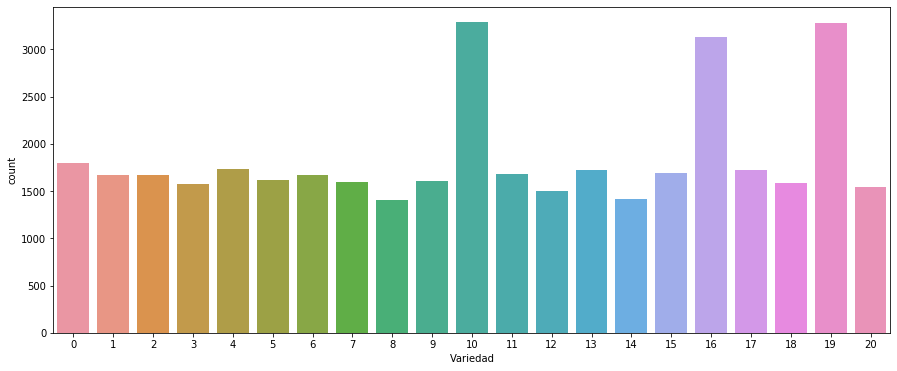

In [28]:
import seaborn as sns
plt.figure(figsize=(15, 6))
sns.countplot(dfa1.Variedad)


In [29]:
print("Valores unicos manchas Foliares:", dfa["Manchas Foliares"].unique())

print("Valores unicos Fursoriasis:", dfa["Fusariosis"].unique())

#En caso de que se decida conservar estas variables, los valores unicos en formas de strings deberán ser convertidos a numéricos

Valores unicos manchas Foliares: ['cero' 'ocho/uno' 'ocho/dos' 'diez' 'ocho/diez']
Valores unicos Fursoriasis: ['cero' 'uno/uno' 'dos/uno']


- Sobre la variable "Conjunto de datos", reemplazo los strings "1erSiembra" y "2daSiembra" por los int 1 y 2 respectivamente.
- Sobre la variable "Ciclos", CC= 0 y CL= 1

In [30]:
dfa1= dfa.replace({"1er Siembra": 1, "2daSiembra": 2, "CL": 1, "CC" :0 })
dfa1.head()
# Los data type de Ciclos y Conjunto de Datos se conviertieron automáticamente a int64

,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,28/11/2018,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


### Problemas con las fechas de maduración y espigazón. 
- En primer lugar se convierte Fecha de espigazón a datetime object

In [31]:
print("Fecha última de espigazón:", dfa1["Fecha de espigaz?"].max())
print("Fecha inicial de espigazón:",dfa1["Fecha de espigaz?"].min())

Fecha última de espigazón: 8/10/2018
Fecha inicial de espigazón: 1/10/2015


In [32]:
print(dfa1["Fecha de espigaz?"].dtype)

object


- Se puede apreciar que existen fechas iniciales anteriores a 2018. A continuación se resuelve ese problema.

- Se analiza luego la fecha de maduración.

In [33]:
print("Fecha última de madurez:", dfa1["Fecha de madurez"].max())
print("Fecha inicial de madurez:",dfa1["Fecha de madurez"].min())

Fecha última de madurez: 4/12/2018
Fecha inicial de madurez: 1/12/2015


In [34]:
dfa1["Fecha de madurez"] = dfa1["Fecha de madurez"].str.replace("2015", "2018")
dfa1["Fecha de madurez"] = dfa1["Fecha de madurez"].str.replace("2016", "2018")


In [35]:
print("Fecha última de madurez:", dfa1["Fecha de madurez"].max())
print("Fecha inicial de madurez:",dfa1["Fecha de madurez"].min())

Fecha última de madurez: 4/12/2018
Fecha inicial de madurez: 1/12/2018


In [36]:
#Detectamos que hay 305 casos en la que la fecha es "02-dec" y abajo corregimos ese problema
dfa1["Fecha de madurez"] = dfa1["Fecha de madurez"].str.replace("2-Dec", "2/12/2018")


In [37]:
import datetime
dfa1["Fecha de madurez"] = pd.to_datetime(dfa1["Fecha de madurez"])
# Error: utOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-12-02 00:00:00
print("Fecha última de madurez:", dfa1["Fecha de madurez"].max())
print("Fecha inicial de madurez:",dfa1["Fecha de madurez"].min())

dfa1.head()

Fecha última de madurez: 2018-12-28 00:00:00
Fecha inicial de madurez: 2018-01-12 00:00:00


,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,1,1,5.4,1,14,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,3/10/2018,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,1,1,5.4,1,14,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,3/10/2018,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,1,1,5.4,1,14,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,3/10/2018,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,1,1,5.4,1,14,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,3/10/2018,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,1,1,5.4,1,14,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,3/10/2018,2018-11-28,56,4.5,85.0,4.0,75.0,36.0,2645,9.5,2783,5567


In [38]:
dfa1["Fecha de espigaz?"] = dfa1["Fecha de espigaz?"].str.replace("2015", "2018")
dfa1["Fecha de espigaz?"] = dfa1["Fecha de espigaz?"].str.replace("2016", "2018")

In [39]:
#cambiar el data type de Fecha de espigazón
import datetime
dfa1["Fecha de espigaz?"] = pd.to_datetime(dfa1["Fecha de espigaz?"])

print("Fecha última de espigazón:", dfa1["Fecha de espigaz?"].max())
print("Fecha inicial de espigazón:",dfa1["Fecha de espigaz?"].min())

Fecha última de espigazón: 2018-12-10 00:00:00
Fecha inicial de espigazón: 2018-01-10 00:00:00


#### 2.4. No Cambiar los Nombres de las Variables de la Fuente de Origen


#### 2.5. Verificación de Consistencia de Datos

Al examinar la ultima fecha de espigazon y la primer fecha de madurez vemos que son el 18/10/2018 y el 18/11/2018 respectivamente, por lo cual consideramos que los datos si son coherentes entre ellos. 

##### Este es el paso más analítico, en donde se deben aplicar reglas de integridad.



#### Template para tests de integridad  -- VER PORQUE NOS DA ERROR el TEST 1

In [40]:
def test1(dfa1):
    """
    Devuelve 0 si el test es exitoso, y 1 si el test falla
    """
    
    return 1

def test2(dfa1):
    """
    Devuelve 0 si el test es exitoso, y 1 si el test falla
    """
    return 0

def test_integridad(dfa1):
    """
    Ejecuta uno por uno los tests e informa el resultado
    """
        
    print('Test 1: %s' % ('ERROR' if test1(dfa1) else 'EXITOSO'))
    print('Test 2: %s' % ('ERROR' if test2(dfa1) else 'EXITOSO'))
        
    return

test_integridad(1)

Test 1: ERROR
Test 2: EXITOSO


#### 2.6. Identificar y Documentar Valores Atípicos/Outliers

In [41]:
dfa1.describe()

,Conjunto de datos,Ciclos,Rep,Parcela,ZADOCK,fila,columna,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Carbon (%),Adversidades,Vuelco,Altura,Aspecto,Peso hecto,Peso de 1000 granos,p grano,hum,PAJUST,RDTO
count,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000,38920.000000
mean,1.477312,0.476285,2.015570,70.379496,5.776295,2.007143,24.081064,54136.002055,18604.489979,55272.557554,35321.392857,17004.025180,-0.512690,-0.347983,-0.769030,0.600881,0.067499,1.223538,0.333267,-0.728762,10.454134,-0.535522,-0.766393,-0.909293,0.601696,0.107837,0.318727,1.848869,83.710714,2.739376,75.157513,35.268602,2539.963258,9.799101,2669.068474,5326.818268
std,0.499491,0.499444,0.823867,42.052894,0.811692,0.819920,13.820227,6738.960154,19970.612059,14307.772507,6606.948615,3031.438494,0.118843,0.054897,0.178264,7.863376,0.226914,0.335319,0.148410,0.126217,0.192727,0.281206,0.426882,4.164370,0.676084,0.900600,1.432656,0.876917,9.384046,0.662652,2.998912,6.817792,603.530414,0.687553,633.484297,1264.511058
min,1.000000,0.000000,1.000000,1.000000,3.900000,1.000000,1.000000,35300.000000,10000.000000,10000.000000,12500.000000,10000.000000,-0.815700,-0.634200,-1.223500,-1392.799600,-0.817400,0.100500,0.101500,-1.496700,9.433500,-0.792100,-0.973400,-775.000300,0.000000,0.000000,0.000000,1.000000,60.000000,1.000000,61.300000,19.000000,970.000000,7.900000,1023.000000,2046.000000
25%,1.000000,0.000000,1.000000,33.000000,5.400000,1.000000,12.000000,49600.000000,12090.000000,46500.000000,30560.000000,14998.000000,-0.573700,-0.379400,-0.860500,0.620500,0.077500,1.167975,0.270900,-0.798600,10.327400,-0.639700,-0.907900,-1.140100,0.000000,0.000000,0.000000,1.000000,75.000000,2.000000,73.700000,31.000000,2175.000000,9.300000,2294.000000,4588.000000
50%,1.000000,0.000000,2.000000,69.000000,5.900000,2.000000,23.000000,54200.000000,13430.000000,55100.000000,35230.000000,17139.000000,-0.519400,-0.345400,-0.779100,0.663300,0.126800,1.290500,0.316300,-0.720500,10.469700,-0.611000,-0.889800,-1.117150,1.000000,0.000000,0.000000,2.000000,85.000000,3.000000,75.700000,35.000000,2520.000000,9.900000,2655.000000,5274.000000
75%,2.000000,1.000000,3.000000,107.000000,6.500000,3.000000,36.000000,58400.000000,14870.000000,63500.000000,39860.000000,19165.000000,-0.469800,-0.314800,-0.704700,0.712700,0.169000,1.406700,0.360700,-0.651700,10.593100,-0.581500,-0.869100,-1.091800,1.000000,0.000000,0.000000,2.000000,90.000000,3.000000,77.000000,39.000000,2880.000000,10.300000,3083.000000,6008.000000
max,2.000000,1.000000,3.000000,144.000000,6.900000,3.000000,48.000000,83800.000000,99900.000000,99900.000000,55230.000000,66870.000000,0.426600,0.666100,0.639900,380.486200,0.727800,6.347200,2.488100,1.607500,10.919300,0.650900,0.914400,157.358700,3.000000,10.000000,10.000000,4.500000,105.000000,4.500000,81.500000,54.000000,4150.000000,11.800000,4362.000000,8725.000000


Del practico de análisis y visualización se obtuvo que los índices SCCI y NGRVI tienen valores atípicos, al igual que las bandas espectrales verdes y roja.

In [42]:
import scipy

corr_SCCI_RDTO = scipy.stats.pearsonr(dfa1.SCCI, dfa1.RDTO)
corr_NGRVI_RDTO = scipy.stats.pearsonr(dfa1.NGRVI, dfa1.RDTO)

print("La correlación de Pearson entre el Indice de Vegeteación SCCI y el Rendimiento es:", round(corr_SCCI_RDTO[0], 4))
print("La correlación de Pearson entre el Indice de Vegeteación NGRVI y el Rendimiento es:", round(corr_NGRVI_RDTO[0], 4))


La correlación de Pearson entre el Indice de Vegeteación SCCI y el Rendimiento es: 0.0165
La correlación de Pearson entre el Indice de Vegeteación NGRVI y el Rendimiento es: -0.0151


Se puede observar una correlacion casi nula entre estos índices y el rendimiento.
- El NGRVI es un indice modificado del MGVRVI por lo tanto, para no perder observaciones al eliminar outliers de esta variable se decide no incluirla en el estudio
- Para el ínidce SCCI se decide remover outliers que se encuentren más allá de la media +- 2 desvíos estandar. Esto implica remover 71 filas del dataset.

In [43]:
### FUNCION DE LIMPIEZA ###
# clean outliers function
def clean_outliers(dataset, column_name, a):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        np.abs(interesting_col - interesting_col.mean()) <= (a* interesting_col.std()))
    return dataset[mask_outlier]

In [44]:
dfa1_clean_prueba = clean_outliers(dfa1, "SCCI", 2) 

print(len(dfa1) - len(dfa1_clean_prueba))

dfa1_clean_prueba =clean_outliers(dfa1_clean_prueba, "Verde", 3)
dfa1_clean_prueba = clean_outliers(dfa1_clean_prueba, "Rojo", 3)

print((len(dfa1) - len(dfa1_clean_prueba)) / len(dfa1))

dfa1=dfa1_clean_prueba

71
0.08332476875642343


**Removiendo los outliers de SCCI + Banda Espectral Roja + Banda Espectral Verde se quitan del datatset un 8,33% de las filas**

### Luego observamos por posible outliers en las variables Target

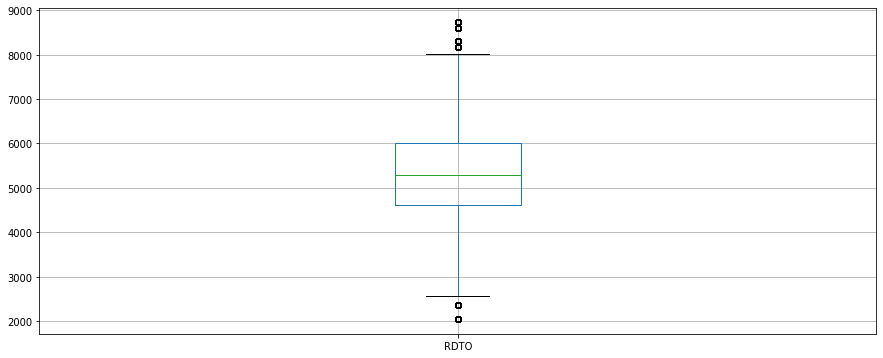

In [45]:
plt.figure(figsize=(15, 6))
dfa1.boxplot(column= "RDTO")

#A priori se pueden observar valores atípicos en la variable target Rendimiento

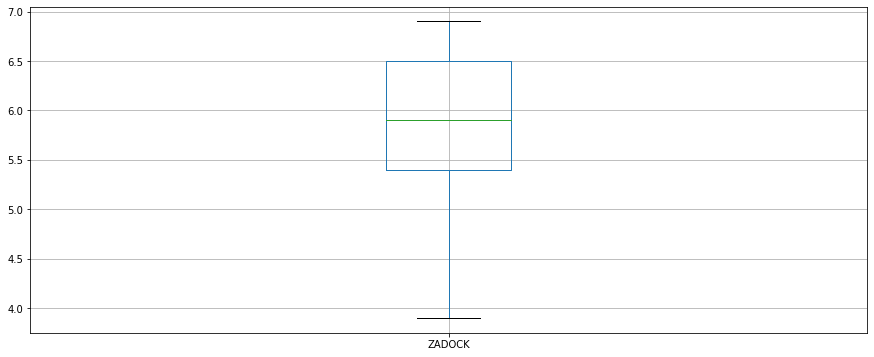

In [46]:
plt.figure(figsize=(15, 6))
dfa1.boxplot(column= "ZADOCK")

In [47]:
dfa1_cleaned= clean_outliers(dfa1, "RDTO", 3)
print(len(dfa1) - len(dfa1_cleaned))

0


Esto implica que el 100% de las observaciones se encuentran entre la media y 3 desviaciones estándar.

#### 2.7. Guardar el Set de Datos con un Nombre Informativo

#### **3.Chequeos por campo**

#### 3.1. Ordenar Variables/Columnas

#### 3.2. Quitar Variables/Columnas Irrelevantes
Como variable respuesta decidimos trabajar con las variables targets "Rendimiento" y "ZADOCK". En cuanto a las variables que consideramos innecesarias para este estudio son el "Peso ajustado", "Peso hecto", "Peso de 1000 granos", "p grano" y "hum" debido a que estas se utilizan en el calculo del Rendimiento por lo cual van a presentar alta correlacion con está.  Tambien se decidio descartar la altura, el nro de plantas caidas (vuelco)  y el aspecto. 

Las variables "rep","fila", "col" y "parcela"  tambien se consideraron irrelevantes, lo que interesa en este practico es identificar las variedades con su rendimiento y estado fenologico al momento de tomar la imagen, estas variables nos identifican las repeticiones o/y lugar fisico de estas en el tereno. 

In [48]:
dfa2=dfa1

In [49]:
dfa2=dfa2.drop(['Peso hecto','Peso de 1000 granos','p grano','hum','PAJUST','Vuelco','Altura', 'Aspecto ','Rep','Parcela','fila','columna'], axis=1)
dfa2

,Longitude,Latitude,Conjunto de datos,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,Fecha de espigaz?,Fecha de madurez,dias entre fechas,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2,0,3,5.9,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006
18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2,0,3,5.9,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006
18575,-2.057.282.750.803.630,-2.120.819.039.930.700,2,0,3,5.9,61800,14780,90300,40600,14391,-0.7251,-0.4766,-1.0876,0.6573,-0.0133,0.9737,0.1594,-1.0372,10.6115,-0.7187,-0.9478,-1.0551,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006


In [50]:
#### 3.3. Renombrar Variables
dfa3= dfa2.rename(columns={'Conjunto de datos': 'F.Siembra','Fecha de espigaz?': 'F_Espigazon','Fecha de madurez': 'F.Madurez','dias entre fechas':'Dias.entre.fechas'})
dfa3            

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Roya (%),Manchas Foliares,Fusariosis,Carbon (%),Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0,cero,cero,0,0.0,2018-03-10,2018-11-28,56,5567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2,0,3,5.9,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006
18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2,0,3,5.9,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006
18575,-2.057.282.750.803.630,-2.120.819.039.930.700,2,0,3,5.9,61800,14780,90300,40600,14391,-0.7251,-0.4766,-1.0876,0.6573,-0.0133,0.9737,0.1594,-1.0372,10.6115,-0.7187,-0.9478,-1.0551,0,cero,cero,0,0.0,2018-09-29,2018-11-28,60,6006


#### 3.4. Categorizar Variables que Contengan “Otros”
A la variables Roya(%), carbon(%), Fusariosis y Manchas Foliares decidimos categorizarlas en Ausente(0) y Presente (1). 
En los casos de roya, carbon y fusariosis el nivel de incidencia de la enfermedad no supera el 10% por lo cual decidimos que no habria que diferenciar distintos niveles de la misma.  


In [51]:
dfa3['Roya_cat'] = dfa3['Roya (%)'].astype('str')
dfa3['Carbon_cat'] = dfa3['Carbon (%)'].astype('str')
dfa3['Fusariosis_cat']=dfa3['Fusariosis'].astype('str')
dfa3['ManchasFoliares_cat']=dfa3['Manchas Foliares'].astype('str')


In [52]:
dfa3.dtypes

Longitude                      object
Latitude                       object
F.Siembra                       int64
Ciclos                          int64
Variedad                     category
ZADOCK                        float64
Azul                            int64
Verde                           int64
Rojo                            int64
Borde rojo                      int64
Infra Rojo                      int64
NDVI                          float64
NDRE                          float64
SAVI                          float64
SCCI                          float64
GNDVI                         float64
GVI                           float64
RVI                           float64
RedEdgeVI                     float64
LNVI                          float64
GRVI                          float64
MGRVI                         float64
NGRVI                         float64
Roya (%)                        int64
Manchas Foliares               object
Fusariosis                     object
Carbon (%)  

In [53]:
dfa3["Roya_cat"] = dfa3["Roya_cat"].str.replace("2", "1")
dfa3["Roya_cat"] = dfa3["Roya_cat"].str.replace("3", "1")

dfa3["Carbon_cat"] = dfa3['Carbon_cat'].str.replace("2", "1")
dfa3["Carbon_cat"] = dfa3['Carbon_cat'].str.replace("5", "1")
dfa3["Carbon_cat"] = dfa3['Carbon_cat'].str.replace("10", "1")


dfa3['Fusariosis_cat']=dfa3['Fusariosis_cat'].str.replace('cero','0')
dfa3['Fusariosis_cat']=dfa3['Fusariosis_cat'].str.replace('uno/uno','1')
dfa3['Fusariosis_cat']=dfa3['Fusariosis_cat'].str.replace('dos/uno','1')

dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].str.replace('cero','0')
dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].str.replace('diez','1')
dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].str.replace('ocho/diez','1')
dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].str.replace('ocho/dos','1')
dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].str.replace('ocho/uno','1') 

In [54]:
dfa3['Roya_cat'] = dfa3['Roya_cat'].astype('category')
dfa3['Carbon_cat'] = dfa3['Carbon_cat'].astype('category')
dfa3['Fusariosis_cat']=dfa3['Fusariosis_cat'].astype('category')

In [55]:
dfa3['ManchasFoliares_cat']=dfa3['ManchasFoliares_cat'].astype('category')

In [56]:
dfa3=dfa3.drop(['Roya (%)','Carbon (%)','Fusariosis','Manchas Foliares'],axis=1)
dfa3

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12203,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0
12204,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0
12205,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0
12206,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0
12207,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18573,-2.057.283.002.672.780,-2.120.819.117.678.180,2,0,3,5.9,71500,16070,86500,43810,18228,-0.6519,-0.4124,-0.9778,0.6326,0.0629,1.1343,0.2107,-0.8769,10.6876,-0.6867,-0.9333,-1.0715,0.0,2018-09-29,2018-11-28,60,6006,0,0,0,0
18574,-2.057.282.876.332.790,-2.120.819.078.803.990,2,0,3,5.9,66900,14510,77400,38050,15120,-0.6732,-0.4313,-1.0097,0.6407,0.0206,1.0420,0.1953,-0.9229,10.5467,-0.6843,-0.9321,-1.0728,0.0,2018-09-29,2018-11-28,60,6006,0,0,0,0
18575,-2.057.282.750.803.630,-2.120.819.039.930.700,2,0,3,5.9,61800,14780,90300,40600,14391,-0.7251,-0.4766,-1.0876,0.6573,-0.0133,0.9737,0.1594,-1.0372,10.6115,-0.7187,-0.9478,-1.0551,0.0,2018-09-29,2018-11-28,60,6006,0,0,0,0


#### 3.5. Agregar Metadata a los Datos
El dataframe no presento valores faltantes, en cuanto a los outliers se eliminaron los que esten mas alla de la media mas menos 2 desvio estandar, removiendo los outliers de SCCI + Banda Espectral Roja + Banda Espectral Verde se quitan del datatset un 8,33% de las filas.
A las variables fechas se las corrigio sabiendo que el ensayo se realizo durante el año 2018, no existiendo la posibilidad de fechas de otros años. 
En cuanto a las variables que consideramos innecesarias para este estudio son el "Peso ajustado", "Peso hecto", "Peso de 1000 granos", "p grano" y "hum" debido a que estas se utilizan en el calculo del Rendimiento por lo cual van a presentar alta correlacion con está. Tambien se decidio descartar la altura, el nro de plantas caidas (vuelco) y el aspecto.
Las variables "rep","fila", "col" y "parcela" tambien se consideraron irrelevantes, lo que interesa en este practico es identificar las variedades con su rendimiento y estado fenologico al momento de tomar la imagen, estas variables nos identifican las repeticiones o/y lugar fisico de estas en el tereno.
En cuanto a las enfermedades, se decidio trabajarla de forma dicotomica con valores de 0 (enfermedad ausente) o 1 (enfermedad presente con baja incidencia).

A los datos tambien se le anexar datos climaticos que fueron obtenidos de https://clima.bccba.org.ar/accounts/login/?next=/ . En esto se tomaron los valores (medio,minimos y maximos) de Temperatura del aire, temperatura del suelo, Humedad Relativa y precipitaciones acumuladas. 



# II.Incorporación de datos climáticos

#### **1. Incorporación de información climática**

##### Variables climáticas a utilizar para incorporar al dataset. Explorar

#### **2. Unificar**

##### Unificar el dataset obtenido (luego de aplicar la limpieza) con los datos climáticos.

In [57]:
dfc.columns

Index(['Fecha', 'Tem. [°C] Prom', 'Tem. [°C] Mín', 'Tem. [°C] Máx',
       'Presion [hPa] Prom', 'Presion [hPa] Mín', 'Presion [hPa] Máx',
       'Temp suelo [°C] Prom', 'Temp suelo [°C] Mín', 'Temp suelo [°C] Máx',
       'Lluvia Acum[mm]', 'Máx Inten. de Lluvia [mm/10min]',
       'Inten de Lluvia [mm/h]', 'Vel de Viento [Km/h] Prom',
       'Vel de Viento [Km/h] Máx', 'Hum [%HR] Prom', 'Hum [%HR] Mín',
       'Hum [%HR] Máx', 'Raf. de Viento [km/h Prom',
       'Raf. de Viento [km/h Máx'],
      dtype='object')

In [58]:
dfc1=dfc.drop(['Presion [hPa] Prom', 'Presion [hPa] Mín', 'Presion [hPa] Máx','Vel de Viento [Km/h] Prom',
       'Vel de Viento [Km/h] Máx','Raf. de Viento [km/h Prom',
       'Raf. de Viento [km/h Máx', 'Máx Inten. de Lluvia [mm/10min]',
       'Inten de Lluvia [mm/h]'],axis=1)
dfc1

,Fecha,Tem. [°C] Prom,Tem. [°C] Mín,Tem. [°C] Máx,Temp suelo [°C] Prom,Temp suelo [°C] Mín,Temp suelo [°C] Máx,Lluvia Acum[mm],Hum [%HR] Prom,Hum [%HR] Mín,Hum [%HR] Máx
0,2018-01-09,7.607,2.66,13.09,13.056,12.2,14.2,0.2,64.772,47.11,79.58
1,2018-02-09,9.435,-2.22,20.18,13.622,10.9,17.1,0.0,63.006,32.49,94.14
2,2018-03-09,12.033,-1.41,24.41,14.749,11.7,18.3,0.0,56.105,24.98,92.58
3,2018-04-09,15.197,3.42,25.52,15.890,13.4,18.6,0.0,53.732,26.08,85.07
4,2018-05-09,20.149,12.99,29.86,17.445,15.3,20.2,0.0,42.932,21.78,61.21
5,2018-06-09,17.655,3.95,29.19,18.453,15.5,21.7,0.0,51.186,23.45,88.56
6,2018-07-09,17.740,9.75,27.70,18.923,16.4,22.0,0.0,54.341,30.24,83.58
7,2018-08-09,18.792,7.88,29.86,19.290,16.8,22.2,0.0,53.979,23.03,89.92
8,2018-09-09,18.122,9.62,27.25,19.627,17.3,22.2,0.0,53.020,27.42,80.53
9,2018-10-09,18.823,13.14,26.09,20.335,18.3,23.0,0.0,60.318,38.79,82.47


In [59]:
resultado=dfa3.merge(dfc1, how='inner', on=None, left_on='F_Espigazon', right_on='Fecha')

In [60]:
resultado

valores_faltantes = pd.DataFrame([resultado.isnull().sum(),
                                   resultado.isnull().sum()/len(resultado)]).transpose().rename(columns = {0:'Cantidad_NaN',1:'Porcentaje_Nan_s_Total'})

valores_faltantes.loc[valores_faltantes['Cantidad_NaN']>0].style.format({'Porcentaje_Nan_s_Total':"{:.2%}"})

,Cantidad_NaN,Porcentaje_Nan_s_Total


In [61]:
resultado

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,Fecha,Tem. [°C] Prom,Tem. [°C] Mín,Tem. [°C] Máx,Temp suelo [°C] Prom,Temp suelo [°C] Mín,Temp suelo [°C] Máx,Lluvia Acum[mm],Hum [%HR] Prom,Hum [%HR] Mín,Hum [%HR] Máx
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,-2.057.280.571.441.680,-2.120.815.787.491.000,2,0,14,6.7,78200,16570,95800,47640,16368,-0.7082,-0.4886,-1.0622,0.6899,-0.0061,0.9878,0.1709,-1.0683,10.7714,-0.7051,-0.9419,-1.0617,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35673,-2.057.280.445.102.590,-2.120.815.748.616.810,2,0,14,6.7,65700,13740,76200,40650,13159,-0.7055,-0.5109,-1.0582,0.7242,-0.0216,0.9577,0.1727,-1.1279,10.6128,-0.6945,-0.9370,-1.0672,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35674,-2.057.280.318.762.590,-2.120.815.708.933.580,2,0,14,6.7,60800,13240,80300,37760,12346,-0.7335,-0.5072,-1.1002,0.6915,-0.0349,0.9325,0.1537,-1.1179,10.5390,-0.7169,-0.9471,-1.0559,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35675,-2.057.284.871.043.910,-2.120.815.178.468.320,2,0,14,6.7,63100,16730,78500,46610,21292,-0.5733,-0.3729,-0.8599,0.6504,0.1200,1.2727,0.2712,-0.7835,10.7496,-0.6486,-0.9131,-1.0952,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39


In [62]:
dfc1.columns

Index(['Fecha', 'Tem. [°C] Prom', 'Tem. [°C] Mín', 'Tem. [°C] Máx',
       'Temp suelo [°C] Prom', 'Temp suelo [°C] Mín', 'Temp suelo [°C] Máx',
       'Lluvia Acum[mm]', 'Hum [%HR] Prom', 'Hum [%HR] Mín', 'Hum [%HR] Máx'],
      dtype='object')

In [63]:
resultado=resultado.rename(columns={'Tem. [°C] Prom':'T.prom.Espig','Tem. [°C] Mín': 'T.min.Espig','Tem. [°C] Máx': 'T.max.Espig',
                                    'Temp suelo [°C] Prom':'T.suelo.prom.Espig','Temp suelo [°C] Mín':'T.suelo.min.Espig','Temp suelo [°C] Máx':'T.suelo.max.Espig',
                                   'Lluvia Acum[mm]':'PP.acum.Espig','Hum [%HR] Prom':'HR.prom.Espig','Hum [%HR] Mín':'HR.min.Espig','Hum [%HR] Máx':'HR.max.Espig'})

In [64]:
resultado

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,Fecha,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,-2.057.280.571.441.680,-2.120.815.787.491.000,2,0,14,6.7,78200,16570,95800,47640,16368,-0.7082,-0.4886,-1.0622,0.6899,-0.0061,0.9878,0.1709,-1.0683,10.7714,-0.7051,-0.9419,-1.0617,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35673,-2.057.280.445.102.590,-2.120.815.748.616.810,2,0,14,6.7,65700,13740,76200,40650,13159,-0.7055,-0.5109,-1.0582,0.7242,-0.0216,0.9577,0.1727,-1.1279,10.6128,-0.6945,-0.9370,-1.0672,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35674,-2.057.280.318.762.590,-2.120.815.708.933.580,2,0,14,6.7,60800,13240,80300,37760,12346,-0.7335,-0.5072,-1.1002,0.6915,-0.0349,0.9325,0.1537,-1.1179,10.5390,-0.7169,-0.9471,-1.0559,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39
35675,-2.057.284.871.043.910,-2.120.815.178.468.320,2,0,14,6.7,63100,16730,78500,46610,21292,-0.5733,-0.3729,-0.8599,0.6504,0.1200,1.2727,0.2712,-0.7835,10.7496,-0.6486,-0.9131,-1.0952,0.0,2018-09-24,2018-11-20,57,7066,0,0,0,0,2018-09-24,17.084,9.86,25.37,22.174,19.8,24.8,0.0,42.020,24.45,61.39


In [65]:
resultadofinal=resultado.merge(dfc1, how='inner', on=None, left_on='F.Madurez', right_on='Fecha')
resultadofinal

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,Fecha_x,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig,Fecha_y,Tem. [°C] Prom,Tem. [°C] Mín,Tem. [°C] Máx,Temp suelo [°C] Prom,Temp suelo [°C] Mín,Temp suelo [°C] Máx,Lluvia Acum[mm],Hum [%HR] Prom,Hum [%HR] Mín,Hum [%HR] Máx
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,-2.057.279.018.110.150,-2.120.814.275.462.560,2,0,20,6.5,65800,14690,74900,39130,18764,-0.5993,-0.3518,-0.8990,0.5870,0.1218,1.2773,0.2505,-0.7349,10.5746,-0.6721,-0.9259,-1.0800,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35673,-2.057.278.891.771.050,-2.120.814.236.589.270,2,0,20,6.5,62600,13480,67600,34210,15972,-0.6178,-0.3634,-0.9266,0.5883,0.0846,1.1849,0.2363,-0.7617,10.4403,-0.6675,-0.9235,-1.0828,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35674,-2.057.278.765.431.060,-2.120.814.197.715.080,2,0,20,6.5,59000,12180,62300,30480,13229,-0.6497,-0.3947,-0.9745,0.6075,0.0413,1.0861,0.2123,-0.8347,10.3248,-0.6729,-0.9264,-1.0795,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35675,-2.057.279.060.224.080,-2.120.814.159.650.820,2,0,20,6.5,69900,14170,80700,38650,14598,-0.6936,-0.4517,-1.0404,0.6512,0.0149,1.0302,0.1809,-0.9737,10.5623,-0.7013,-0.9402,-1.0636,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80

In [68]:
resultadofinal=resultadofinal.rename(columns={'Tem. [°C] Prom':'T.prom.Madurez','Tem. [°C] Mín': 'T.min.Madurez','Tem. [°C] Máx': 'T.max.Madurez',
                                    'Temp suelo [°C] Prom':'T.suelo.prom.Madurez','Temp suelo [°C] Mín':'T.suelo.min.Madurez','Temp suelo [°C] Máx':'T.suelo.max.Madurez',
                                   'Lluvia Acum[mm]':'PP.acum.Madurez','Hum [%HR] Prom':'HR.prom.Madurez','Hum [%HR] Mín':'HR.min.Madurez','Hum [%HR] Máx':'HR.max.Madurez'})

dataframelimpio=resultadofinal
dataframelimpio

,Longitude,Latitude,F.Siembra,Ciclos,Variedad,ZADOCK,Azul,Verde,Rojo,Borde rojo,Infra Rojo,NDVI,NDRE,SAVI,SCCI,GNDVI,GVI,RVI,RedEdgeVI,LNVI,GRVI,MGRVI,NGRVI,Adversidades,F_Espigazon,F.Madurez,Dias.entre.fechas,RDTO,Roya_cat,Carbon_cat,Fusariosis_cat,ManchasFoliares_cat,Fecha_x,T.prom.Espig,T.min.Espig,T.max.Espig,T.suelo.prom.Espig,T.suelo.min.Espig,T.suelo.max.Espig,PP.acum.Espig,HR.prom.Espig,HR.min.Espig,HR.max.Espig,Fecha_y,T.prom.Madurez,T.min.Madurez,T.max.Madurez,T.suelo.prom.Madurez,T.suelo.min.Madurez,T.suelo.max.Madurez,PP.acum.Madurez,HR.prom.Madurez,HR.min.Madurez,HR.max.Madurez
0,-2.057.297.803.054.350,-2.120.827.812.446.900,1,1,9,5.4,47700,12170,50100,33200,16748,-0.4989,-0.3294,-0.7484,0.6602,0.1583,1.3762,0.3343,-0.6843,10.4103,-0.6091,-0.8886,-1.1254,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
1,-2.057.297.676.715.260,-2.120.827.773.572.710,1,1,9,5.4,52300,11770,49500,32220,17738,-0.4724,-0.2899,-0.7086,0.6137,0.2023,1.5071,0.3583,-0.5969,10.3803,-0.6158,-0.8930,-1.1199,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
2,-2.057.297.550.375.270,-2.120.827.734.699.420,1,1,9,5.4,56100,14200,59400,38940,18662,-0.5219,-0.3520,-0.7828,0.6746,0.1358,1.3142,0.3142,-0.7355,10.5698,-0.6141,-0.8919,-1.1212,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
3,-2.057.297.971.508.270,-2.120.827.735.509.350,1,1,9,5.4,50300,12960,49000,35890,17884,-0.4652,-0.3348,-0.6978,0.7198,0.1596,1.3799,0.3650,-0.6966,10.4882,-0.5817,-0.8692,-1.1504,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
4,-2.057.297.845.168.280,-2.120.827.696.635.160,1,1,9,5.4,52300,13080,53000,34950,18014,-0.4927,-0.3198,-0.7390,0.6491,0.1587,1.3772,0.3399,-0.6628,10.4617,-0.6041,-0.8852,-1.1297,0.0,2018-03-10,2018-11-28,56,5567,0,0,0,0,2018-03-10,15.141,3.73,25.08,17.981,15.2,21.4,0.0,51.486,23.85,92.90,2018-11-28,19.816,12.45,27.31,-25.438,-25.7,-25.1,0.0,78.627,45.35,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35672,-2.057.279.018.110.150,-2.120.814.275.462.560,2,0,20,6.5,65800,14690,74900,39130,18764,-0.5993,-0.3518,-0.8990,0.5870,0.1218,1.2773,0.2505,-0.7349,10.5746,-0.6721,-0.9259,-1.0800,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35673,-2.057.278.891.771.050,-2.120.814.236.589.270,2,0,20,6.5,62600,13480,67600,34210,15972,-0.6178,-0.3634,-0.9266,0.5883,0.0846,1.1849,0.2363,-0.7617,10.4403,-0.6675,-0.9235,-1.0828,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35674,-2.057.278.765.431.060,-2.120.814.197.715.080,2,0,20,6.5,59000,12180,62300,30480,13229,-0.6497,-0.3947,-0.9745,0.6075,0.0413,1.0861,0.2123,-0.8347,10.3248,-0.6729,-0.9264,-1.0795,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10.80,27.66,21.975,19.8,24.7,0.0,52.403,33.92,83.81,2018-11-25,21.688,13.07,28.99,-25.023,-25.3,-24.8,0.0,57.513,35.00,83.46
35675,-2.057.279.060.224.080,-2.120.814.159.650.820,2,0,20,6.5,69900,14170,80700,38650,14598,-0.6936,-0.4517,-1.0404,0.6512,0.0149,1.0302,0.1809,-0.9737,10.5623,-0.7013,-0.9402,-1.0636,0.0,2018-09-25,2018-11-25,61,3930,1,0,0,0,2018-09-25,18.946,10

In [69]:
dataframelimpio.to_csv(r'C:/Users/Franco/Desktop/Mentoria-Imagenes_Drones/dataframelimpio.csv')